<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representações-para-a-portadora-óptica" data-toc-modified-id="Representações-para-a-portadora-óptica-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representações para a portadora óptica</a></span><ul class="toc-item"><li><span><a href="#Modulações-digitais" data-toc-modified-id="Modulações-digitais-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modulações digitais</a></span></li><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li></ul></li><li><span><a href="#Modulador-de-Mach-Zehnder" data-toc-modified-id="Modulador-de-Mach-Zehnder-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modulador de Mach-Zehnder</a></span><ul class="toc-item"><li><span><a href="#Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica" data-toc-modified-id="Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transmitindo informação na intensidade (potência) da portadora óptica</a></span></li><li><span><a href="#Transmitindo-informação-na-amplitude-do-campo-elétrico" data-toc-modified-id="Transmitindo-informação-na-amplitude-do-campo-elétrico-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transmitindo informação na amplitude do campo elétrico</a></span></li></ul></li><li><span><a href="#Intervalos-de-sinalização" data-toc-modified-id="Intervalos-de-sinalização-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intervalos de sinalização</a></span><ul class="toc-item"><li><span><a href="#Teorema-da-amostragem" data-toc-modified-id="Teorema-da-amostragem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Teorema da amostragem</a></span></li></ul></li><li><span><a href="#Chaveamento-por-deslocamento-de-amplitude-(amplitude-shift-keying---ASK-ou-pulse-amplitude-modulation---PAM)" data-toc-modified-id="Chaveamento-por-deslocamento-de-amplitude-(amplitude-shift-keying---ASK-ou-pulse-amplitude-modulation---PAM)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chaveamento por deslocamento de amplitude (<em>amplitude shift-keying</em> - ASK ou <em>pulse amplitude modulation</em> - PAM)</a></span><ul class="toc-item"><li><span><a href="#Gerando-sinais-binários-OOK" data-toc-modified-id="Gerando-sinais-binários-OOK-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gerando sinais binários OOK</a></span><ul class="toc-item"><li><span><a href="#Pulso-retangular-ideal" data-toc-modified-id="Pulso-retangular-ideal-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Pulso retangular ideal</a></span></li><li><span><a href="#Pulso-NRZ-típico" data-toc-modified-id="Pulso-NRZ-típico-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Pulso NRZ típico</a></span></li><li><span><a href="#Pulso-cosseno-levantado" data-toc-modified-id="Pulso-cosseno-levantado-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Pulso cosseno levantado</a></span></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-do-sinal-modulado" data-toc-modified-id="Densidade-espectral-de-potência-do-sinal-modulado-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Densidade espectral de potência do sinal modulado</a></span></li><li><span><a href="#4-PAM" data-toc-modified-id="4-PAM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>4-PAM</a></span></li></ul></li><li><span><a href="#QPSK" data-toc-modified-id="QPSK-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>QPSK</a></span></li></ul></div>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import cos, sin, exp, Matrix, sqrt
import pandas as pd
from scipy.interpolate import interp1d

from IPython.display import display, Math
from IPython.display import display as disp

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CSS = """
# .output {
#     align-items: center;
# }
# """

# HTML('<style>{}</style>'.format(CSS))

In [3]:
figsize(10, 3)

# Geração de sinais ópticos

Num sistema de comunicação digital óptica, a função do transmissor é converter uma dada sequência de bits num trem de pulsos elétricos que, por sua vez, será utilizado na modulação de uma portadora óptica (laser). A modulação de portadoras ópticas é realizada por meio de dispositivos de conversão eletro-óptica.

<img src="./figuras/Tx_OOK.png" width="500">

Diversas técnicas de modulação podem ser implementadas e diversos fatores podem influenciar o projeto de um transmissor óptico. 

## Representações para a portadora óptica

O campo elétrico $\mathbf{E}(t)$ da portadora óptica portadora óptica de onda contínua pode ser representado por

$$\begin{equation} \mathbf{E}(t) = A \cos \left(\omega_c t + \theta\right) \mathbf{e} \end{equation}$$ 

em que $\omega_c = 2\pi f_{c}\label{eq1} $ rad/s é a frequência angular de oscilação, $A$ a amplitude e $\theta$ a fase da onda.

In [4]:
θ, omega_c, A, t = sp.symbols('θ, omega_c, A, t', real=True)

j = sp.I
π = sp.pi

E = A*cos(omega_c*t + θ)

disp(Math('E(t) = '+sp.latex(E)))

<IPython.core.display.Math object>

$E(t)=\operatorname{Re}\left[A e^{j \theta} \exp \left(j \omega_c t\right)\right]$

In [5]:
E = sp.re(A*exp(j*θ)*exp(j*omega_c*t)).simplify()

disp(Math('E(t) = '+sp.latex(E)))

<IPython.core.display.Math object>

In [6]:
E = sp.expand_trig(E).cancel()

disp(Math('E(t) = '+sp.latex(E)))

<IPython.core.display.Math object>

In [7]:
print('Portadora:')
disp(Math('E(t) = '+sp.latex(E)))


print('Representação fasorial polar:')
disp(Math('\hat{E}(t) = '+sp.latex(A*exp(j*θ))))


print('Representação fasorial cartesiana:')
A_I = sp.re(A*exp(j*θ))
A_Q = sp.im(A*exp(j*θ))

disp(Math('\hat{E}(t) = '+sp.latex(A_I + j*A_Q)))

disp(Math('A_I = '+sp.latex(A_I)))
disp(Math('A_Q = '+sp.latex(A_Q)))

Portadora:


<IPython.core.display.Math object>

Representação fasorial polar:


<IPython.core.display.Math object>

Representação fasorial cartesiana:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Modulações digitais

Uma modulação digital é uma função $F$ que mapeia bits ou conjuntos de bits a símbolos (fasores) no plano complexo

$$ F: \{0, 1\}^k\rightarrow \{A_m,\theta_m\}_{m=1}^M$$

em que sequências de $k$ bits são mapeadas num conjunto de $M$ símbolos.

Ex.1: $\{0, 1\}\rightarrow \{(0, 0), (A, 0)\}$ (modulação OOK) 


Ex.2: $\{0, 1\}\rightarrow \{(A, 0), (A, \pi )\}$ (modulação BPSK)


Ex.3: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(A, 0), (A/3, 0), (2A/3, 0), (A, 0)\}$ (modulação 4-PAM ou 4-ASK)


Ex.4: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(A, \pi/4), (A, 3\pi/4), (A, 5\pi/4), (A, 7\pi/4)\}$ (modulação QPSK)

### Diagramas de constelação

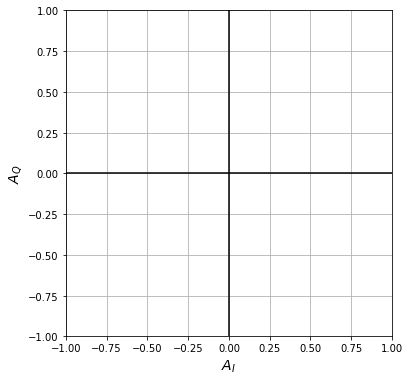

In [8]:
plt.figure(figsize=(6,6))
plt.plot([],[])
plt.vlines(0,-1,1)
plt.hlines(0,-1,1)
plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1);

In [9]:
E = E.subs({θ:0})
disp(Math('E(t) = '+sp.latex(E)))
disp(Math('\hat{E}(t) = '+sp.latex(A)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Modulador de Mach-Zehnder


<img src="./figuras/MZM.png" width="600">


$$\begin{equation}
\left[\begin{array}{l}
\hat{E}_{1} \\
\hat{E}_{2}
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{cc}
e^{j \phi_{1}} & 0 \\
0 & e^{j \phi_{2}}
\end{array}\right]\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{c}
\hat{E}_{i} \\
0
\end{array}\right]
\end{equation}$$

In [10]:
ϕ1, ϕ2, ϕ = sp.symbols('ϕ1, ϕ2, ϕ', real=True)
Ai        = sp.symbols('A_i', real=True)

In [11]:
C  = 1/sqrt(2)*Matrix([[1, j],[j, 1]])

disp(Math('C = '+sp.latex(C)))

<IPython.core.display.Math object>

In [12]:
M = Matrix([[exp(j*ϕ1), 0],[0, exp(j*ϕ2)]])

disp(Math('M = '+sp.latex(M)))

<IPython.core.display.Math object>

In [13]:
T = C*M*C

disp(Math('T = '+sp.latex(T)))

<IPython.core.display.Math object>

In [14]:
Ei = Matrix([[Ai],[0]])

disp(Math('\hat{E}_i = '+sp.latex(Ei)))

<IPython.core.display.Math object>

In [15]:
Eo = T*Ei
disp(Math('\hat{E}_o = '+sp.latex(Eo)))

<IPython.core.display.Math object>

In [16]:
Eo[1].subs({ϕ1:ϕ, ϕ2:-ϕ}).simplify()

I*A_i*cos(ϕ)

$$\begin{equation}
\frac{\hat{E}_{\text {out }}(t)}{\hat{E}_{\text {in }}(t)}=\frac{1}{2} \left(e^{j \varphi(t)}+e^{-j \varphi(t)}\right)e^{j\frac{\pi}{2}}
\end{equation}$$

$$
\varphi(t)=\frac{1}{2V_{\pi}}[u(t)+V_b]\pi
$$

$$\begin{equation}
A_{\text {out}}(t) = A_{i n}(t) \cos \left(\frac{1}{2V_{\pi}}[u(t)+V_b]\pi\right)
\end{equation}$$

In [17]:
def mzm(Ai, Vπ, u, Vb):
    """
    Modulador MZM
    
    :param Vπ: tensão Vπ
    :param Vb: tensão de bias
    :param u:  sinal modulante
    :param Ai: amplitude da portadora CW
    
    :return Ao: amplitude da portadora modulada
    """
    π  = np.pi
    Ao = Ai*np.cos(0.5/Vπ*(u+Vb)*π)
    
    return Ao

### Transmitindo informação na intensidade (potência) da portadora óptica

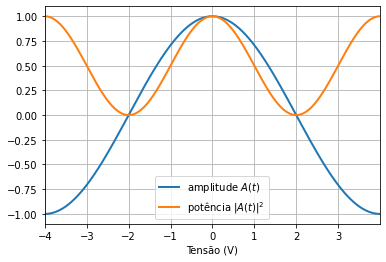

In [18]:
Vπ = 2
Vb = 0#-Vπ/2

u = np.arange(-2*Vπ, 2*Vπ, 0.01)

Ai = 1
Ao = mzm(Ai, Vπ, u, Vb)

plt.figure(figsize=(6,4))
plt.plot(u, Ao, label = 'amplitude $A(t)$', linewidth = 2);
plt.xlabel('Tensão (V)')
plt.xlim(min(u), max(u));

plt.plot(u, np.abs(Ao)**2, label = 'potência $|A(t)|^2$', linewidth = 2);
plt.xlabel('Tensão (V)')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

### Transmitindo informação na amplitude do campo elétrico

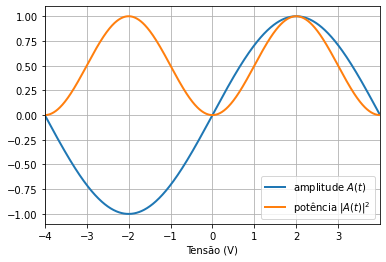

In [19]:
Vπ = 2
Vb = -Vπ

u = np.arange(-2*Vπ, 2*Vπ, 0.01)

Ai = 1

Ao = mzm(Ai, Vπ, u, Vb)

plt.figure(figsize=(6,4))
plt.plot(u, Ao, label = 'amplitude $A(t)$', linewidth = 2);
plt.xlabel('Tensão (V)')
plt.xlim(min(u), max(u));

plt.plot(u, np.abs(Ao)**2, label = 'potência $|A(t)|^2$', linewidth = 2);
plt.xlabel('Tensão (V)')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

## Intervalos de sinalização

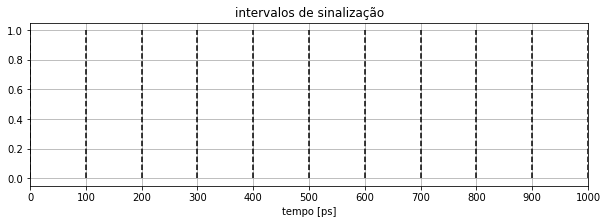

In [20]:
Rs  = 10e9  # Taxa de símbolos [baud]
Ts  = 1/Rs  # Período de símbolo em segundos
N   = 10    # número de intervalos de sinalização

t = np.arange(0, N+1)*(Ts/1e-12) # tempo em picosegundos (ps)

plt.vlines(t, 0, 1, linestyles='dashed', color = 'k')    
plt.xlabel('tempo [ps]');
plt.title('intervalos de sinalização');
plt.grid()
plt.xticks(t);
plt.xlim(0, t.max());

### Teorema da amostragem

Considerre $x(t)$ um sinal limitado em banda, i.e. o espectro de frequências de $X(f)=\mathcal{F}\{x(t)\}$ está contido no intervalo $-B\leq f \leq B$. 

$$ X(f) = \int_{-\infty}^{\infty} x(t)e^{j2\pi f t} dt$$

Suponha que obtenhamos um sinal discreto no tempo $x[k]$ a partir de um conjunto de amostras equiespaçadas de $x(t)$, ou seja $x[k]=x(kT_a)$, em que $T_a = \frac{1}{f_a}$ é o período de amostragem e $f_a$ a frequência de amostragem.

Se $f_a\geq 2B$, $x(t)$ pode ser perfeitamente reconstruído a partir de suas amostras $x[k]$ fazendo

$$
x(t)=\sum_{n=-\infty}^{\infty} x(k T_a) \operatorname{sinc}\left(\frac{t-kT_a}{T_a}\right).
$$


In [21]:
from commpy.utilities  import signal_power, upsample
from utils.dsp import firFilter, pulseShape, eyediagram, sincInterp

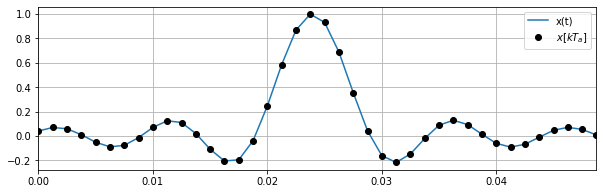

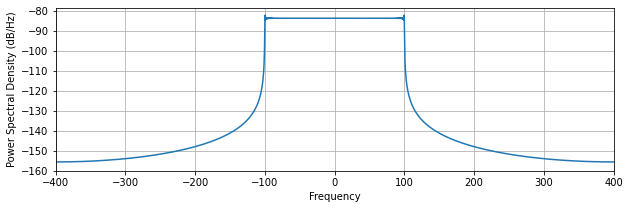

In [22]:
Fa = 800   # frequência de amostragem
B  = 100   # banda da sinc
Ta = 1/Fa  # período de amostragem

d = 20
t = np.arange(0, 2*d)*Ta
x = np.sinc(2*B*(t-d*Ta) + np.pi/15)

plt.figure()
plt.plot(t,x,'-', label = 'x(t)')
plt.plot(t,x,'ko', label = '$x[kT_a]$')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
x_psd = np.sinc(2*B*((np.arange(0, 2000)*Ta)-1000*Ta))
plt.figure();
plt.psd(x_psd, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

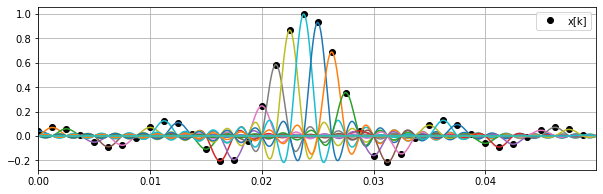

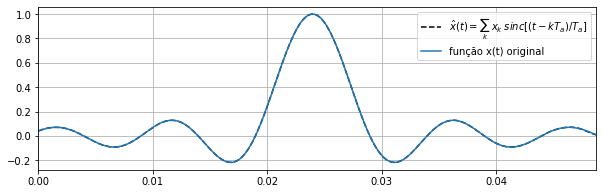

In [23]:
x_interp, t_interp = sincInterp(x, Fa);
sinc_original = interp1d(t, x, kind='cubic',fill_value="extrapolate")

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t_interp, np.sinc(2*B*(t_interp-d*Ta)+ np.pi/15),'-',label = 'função x(t) original')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

## Chaveamento por deslocamento de amplitude (*amplitude shift-keying* - ASK ou *pulse amplitude modulation* - PAM)

$ E(t)=\operatorname{Re}\left[A(t) e^{j \theta} \exp \left(j \omega_c t\right)\right]$

$$ \begin{align} A(t) &= \left[ \sum_{n} s_{n} \delta \left(t-n T_{s}\right)\right] \ast p(t) \nonumber \\ & = \sum_{n} s_{n} p\left(t-n T_{s}\right)\end{align}$$

In [24]:
# parâmetros da simulação
SpS = 32

Rs     = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts     = 1/Rs          # Período de símbolo em segundos
Fa     = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta     = 1/Fa          # Período de amostragem

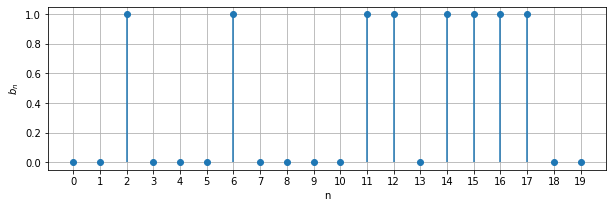

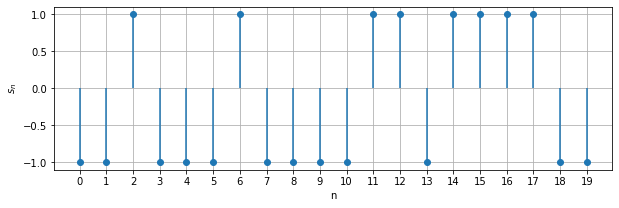

In [25]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=20)    
n      = np.arange(0, bits.size)

# mapeia bits para símbolos binários
symbTx = 2*bits-1

plt.figure(1)
plt.stem(bits, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.grid()
plt.xticks(np.arange(0, bits.size));

plt.figure(2)
plt.stem(symbTx, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.xticks(np.arange(0, symbTx.size));

### Gerando sinais binários OOK

#### Pulso retangular ideal

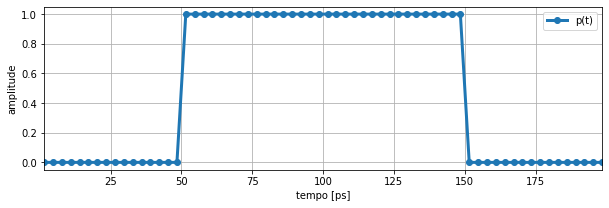

In [26]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso retangular ideal
pulse = pulseShape('rect', SpS)
pulse = pulse/max(abs(pulse))

t = (0.5+np.arange(0, pulse.size))*(Ta/1e-12) # tempo em ps

plt.figure(1)
plt.plot(t, pulse,'-o', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

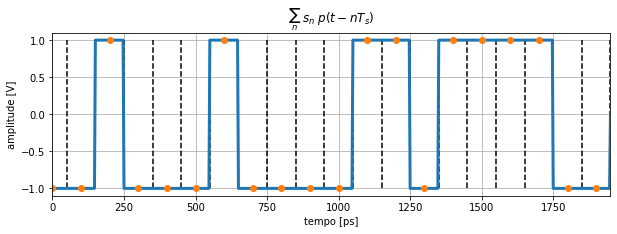

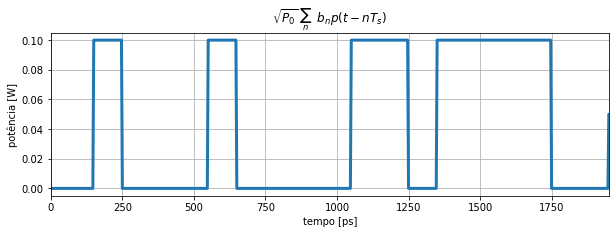

In [27]:
# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx  = sigTx.real

# plota sinal 
t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real, 'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso NRZ típico

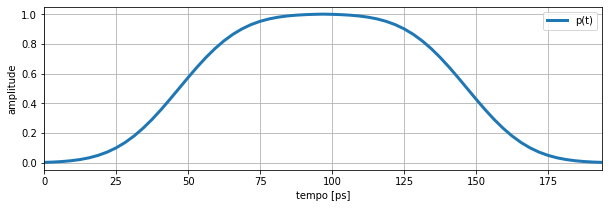

In [28]:
# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

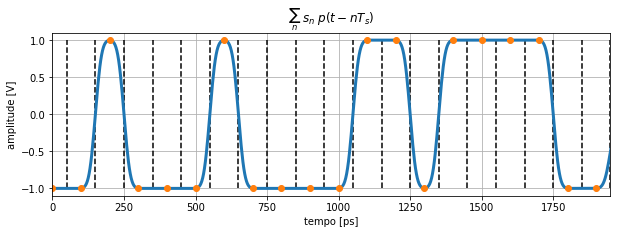

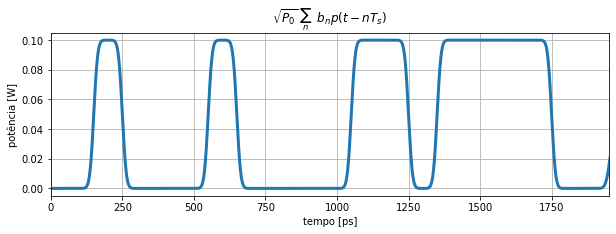

In [29]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso cosseno levantado

$$\large
p(t)=\left\{\begin{array}{ll}
\frac{\pi}{4 T} \operatorname{sinc}\left(\frac{1}{2 \beta}\right), & t=\pm \frac{T}{2 \beta} \\
\frac{1}{T} \operatorname{sinc}\left(\frac{t}{T}\right) \frac{\cos \left(\frac{\pi \beta t}{T}\right)}{1-\left(\frac{2 \beta t}{T}\right)^{2}}, & \text { caso contrário }
\end{array}\right.
$$

$$\large
P(f)=\left\{\begin{array}{ll}
1, & |f| \leq \frac{1-\beta}{2 T} \\
\frac{1}{2}\left[1+\cos \left(\frac{\pi T}{\beta}\left[|f|-\frac{1-\beta}{2 T}\right]\right)\right], & \frac{1-\beta}{2 T}<|f| \leq \frac{1+\beta}{2 T} \\
0, & \text { caso contrário }
\end{array}\right.
$$

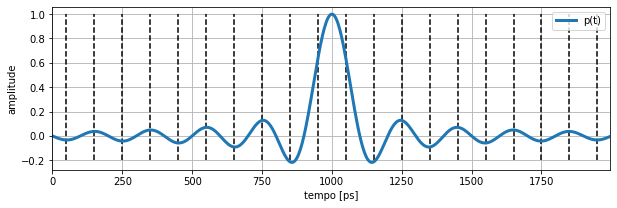

In [30]:
# pulso cosseno levantado (raised cosine)
Ncoeffs = 640
rolloff = 0.01

pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend()

t = (-0.0*Ts + np.arange(0, (Ncoeffs/SpS)*Ts, Ts))/1e-12
plt.vlines(t + 0.5*(Ts/1e-12), -0.2, 1, linestyles='dashed', color = 'k');

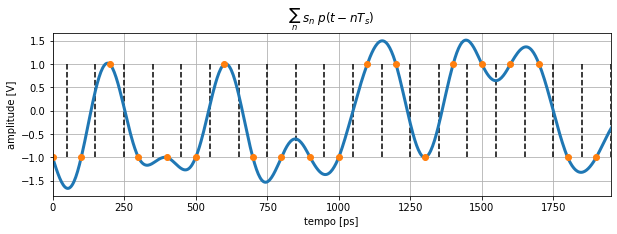

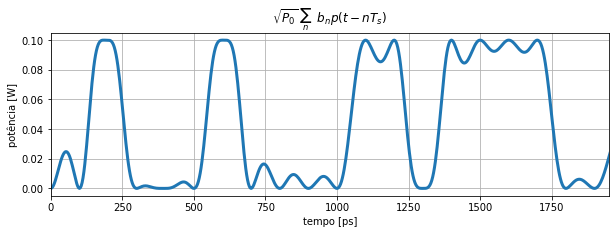

In [31]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso 
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan


plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

### Densidade espectral de potência do sinal modulado

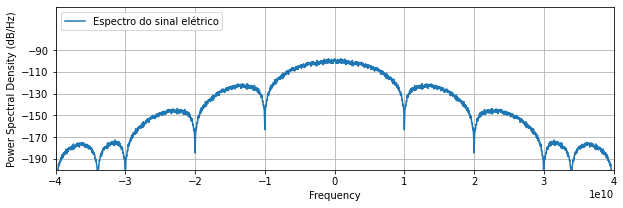

In [32]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# # pulso cosseno levantado (raised cosine)
# Ncoeffs = 640
# rolloff = 0.1

# pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
# pulse = pulse/max(abs(pulse))

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-200,-50);

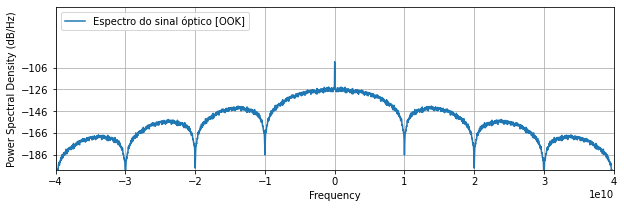

In [33]:
P0 = 100e-3 # potência da portadora CW na entrada no MZM

Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)

sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota psd
plt.figure();
plt.psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico [OOK]')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-200,-50);

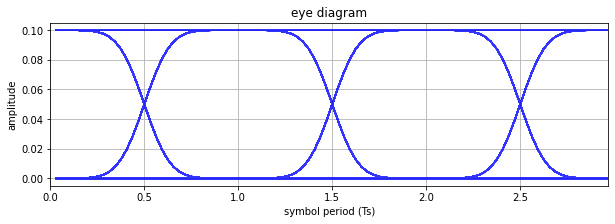

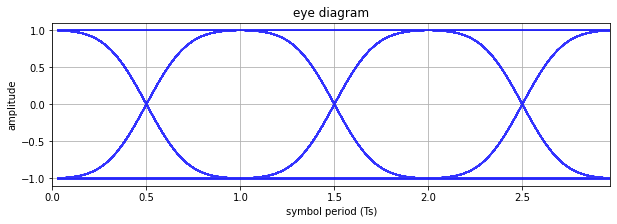

In [34]:
Nsamples = 10000

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS)
eyediagram(sigTx, Nsamples, SpS)

### 4-PAM

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bits a,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0
bits b,0,1,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,0


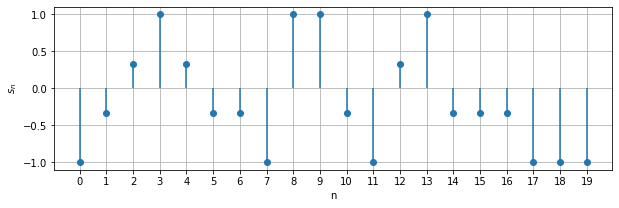

In [35]:
# gera sequência de bits pseudo-aleatórios
bits_a   = np.random.randint(2, size=20)
bits_b   = np.random.randint(2, size=20)

# mapeia bits para símbolos PAM4
symbTx = 2/3*(2*bits_a-1) + 1/3*(2*bits_b-1)

plt.stem(symbTx, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.xticks(np.arange(0, symbTx.size));

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:,d}'.format
df = pd.DataFrame({'bits a': bits_a, 'bits b': bits_b})

display(df.T)

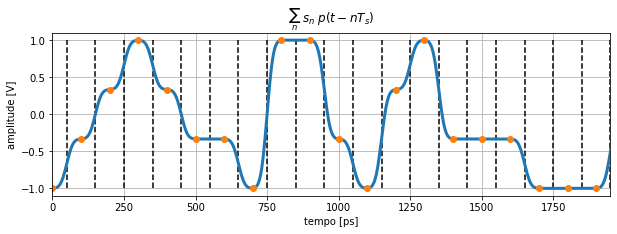

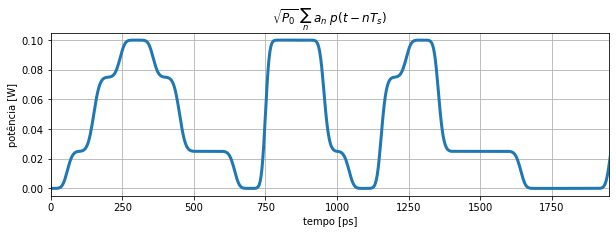

In [36]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, symbTx.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;a_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, symbTx.size))*(Ts/1e-12)
plt.xlim(0, max(t));

# # plota psd
# plt.figure();
# plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal OOK')
# plt.legend(loc='upper left');
# plt.xlim(-3*Rs,3*Rs);
# plt.ylim(-200,-50);

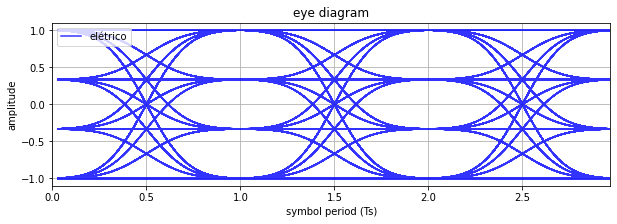

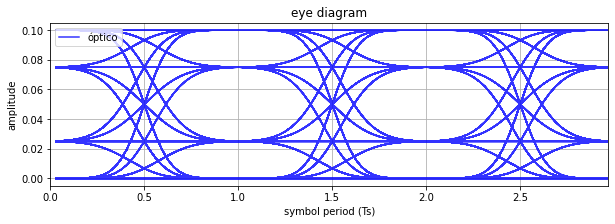

In [37]:
# gera sequência de bits pseudo-aleatórios
bits1   = np.random.randint(2, size=10000)  
bits2   = np.random.randint(2, size=10000) 

n      = np.arange(0, bits.size)

# mapeia bits para símbolos PAM4
symbTx = 2/3*(2*bits1-1) + 1/3*(2*bits2-1)

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

Nsamples = 20000

# diagrama de olho
eyediagram(sigTx, Nsamples, SpS, plotlabel='elétrico')

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS, plotlabel='óptico')

## QPSK

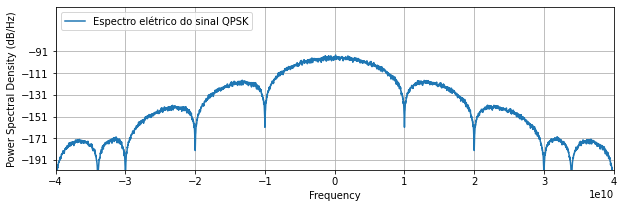

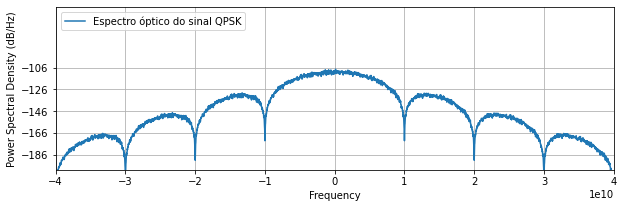

In [38]:
# gera sequência de bits pseudo-aleatórios
bitsI   = np.random.randint(2, size=10000)  
bitsQ   = np.random.randint(2, size=10000) 

n  = np.arange(0, bits.size)

# mapeia bits para símbolos 
symbTx_I = 2*bitsI-1
symbTx_Q = 2*bitsQ-1

symbTx_I = symbTx_I/np.sqrt(signal_power(symbTx_I))
symbTx_Q = symbTx_Q/np.sqrt(signal_power(symbTx_Q))

symbTx = symbTx_I + 1j*symbTx_Q

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro elétrico do sinal QPSK')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-200,-50);

# modulação óptica
Vπ = 2 
Vb = -Vπ
Ai = np.sqrt(P0)

sigTxo_I = mzm(Ai, Vπ, sigTx.real, Vb)
sigTxo_Q = mzm(Ai, Vπ, sigTx.imag, Vb)

sigTxo = sigTxo_I + 1j*sigTxo_Q

# plota psd
plt.figure();
plt.psd(sigTxo, Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro óptico do sinal QPSK')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-200,-50);

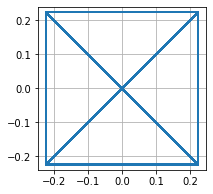

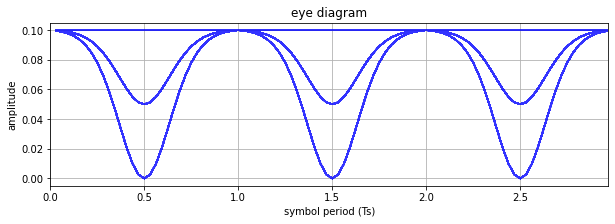

In [39]:
Nsamples = 10000

plt.figure(figsize=(3,3))
plt.plot(sigTxo.real,sigTxo.imag)
plt.grid()
plt.axis('equal');

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS)

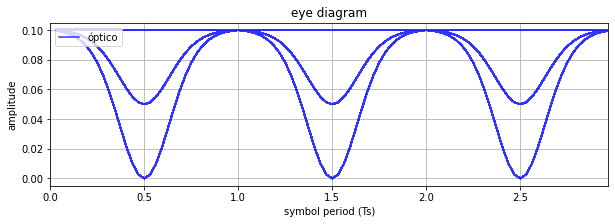

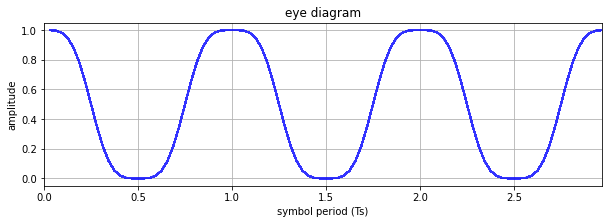

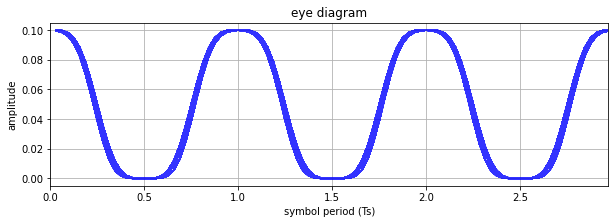

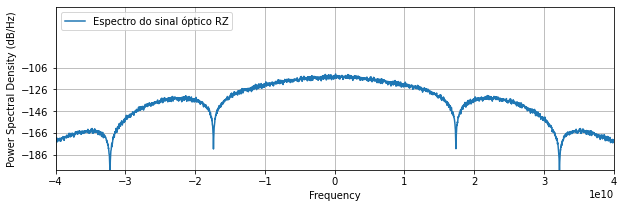

In [40]:
t = np.arange(0, sigTxo.size)*Ta

Vπ = 2 
Vb = Vπ/2
Ai = 1

senoideRF = Vπ/2*np.cos(2*np.pi*Rs*t + np.pi)

sigTxo_   = mzm(sigTxo, Vπ, senoideRF, Vb)

Nsamples = 10000

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS, plotlabel='óptico')
eyediagram(np.abs(mzm(Ai, Vπ, senoideRF, Vb))**2, Nsamples, SpS)
eyediagram(np.abs(sigTxo_)**2, Nsamples, SpS)

# plota psd
plt.figure();
plt.psd(sigTxo_,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico RZ')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-200,-50);

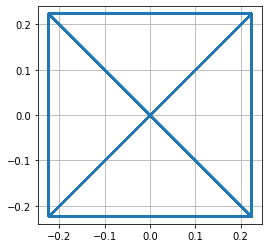

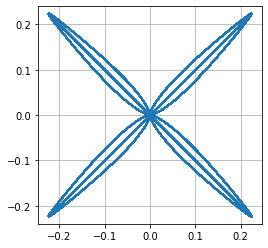

In [41]:
plt.figure(figsize=(4,4))
plt.plot(sigTxo.real,sigTxo.imag)
plt.grid()
plt.axis('equal');

plt.figure(figsize=(4,4))
plt.plot(sigTxo_.real,sigTxo_.imag)
plt.grid()
plt.axis('equal');

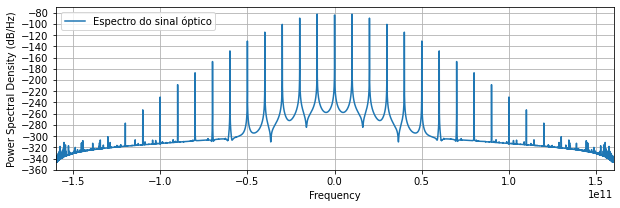

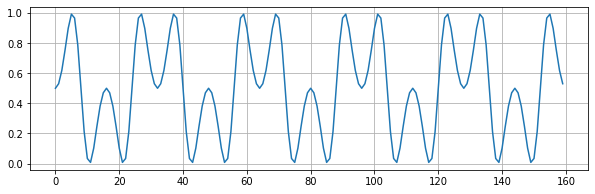

In [42]:
t = np.arange(0, sigTxo.size*8)*Ta

Vπ = 2 
Vb = Vπ/2
Ai = 1

senoideRF = 2*Vπ/2*np.cos(2*np.pi*Rs*t + np.pi)

sigTxo_   = mzm(Ai, Vπ, senoideRF, Vb)
#sigTxo_   = mzm(sigTxo_, Vπ, 5*senoideRF, Vb)

# plota psd
plt.figure();
plt.psd(sigTxo_,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico')
plt.legend(loc='upper left');
plt.xlim(-16*Rs,16*Rs);
#plt.ylim(-200,-50);

plt.figure();
plt.plot(abs(sigTxo_[0:160])**2);
plt.grid()